In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load data

In [2]:
# Load the data:
data= pd.read_csv('adult.data')
data.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### H1 Histogram of Education level

In [3]:
# Load the Education donner
df_education = data[['Education',' Education-num']]
df_education

,Education,Education-num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
...,...,...
32556,Assoc-acdm,12
32557,HS-grad,9
32558,HS-grad,9
32559,HS-grad,9


In [4]:
df_education_num = df_education[' Education-num']
df_education_num

0        13
1        13
2         9
3         7
4        13
         ..
32556    12
32557     9
32558     9
32559     9
32560     9
Name:  Education-num, Length: 32561, dtype: int64

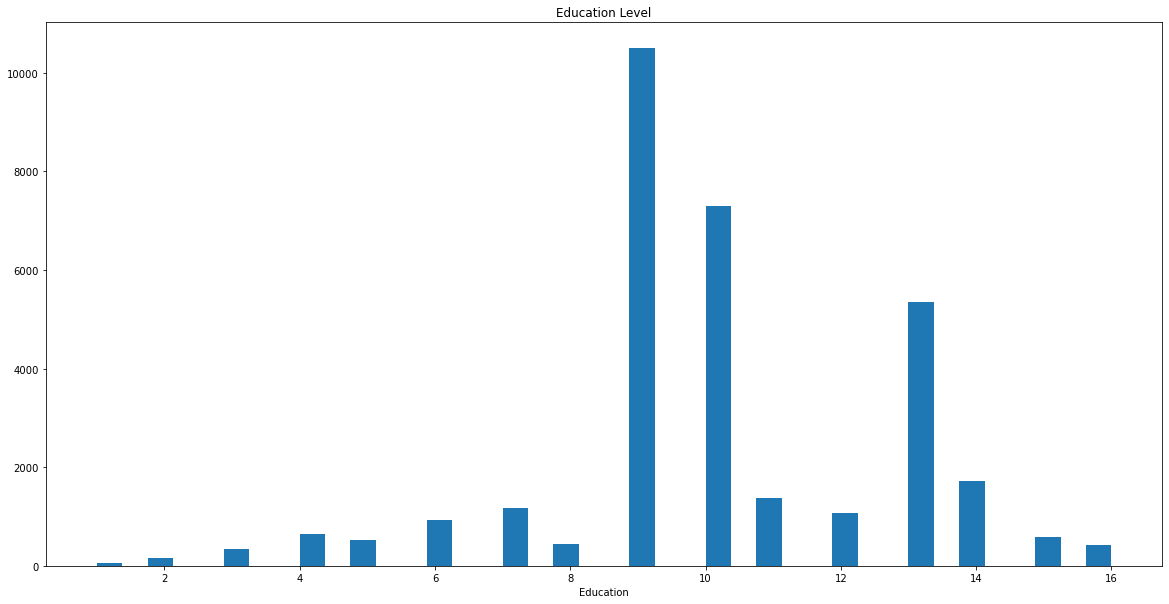

In [5]:
plt.figure(figsize=(20,10))
plt.hist(df_education_num, bins=40)
plt.gca().set(title='Education Level', xlabel='Education');

### H2 Histogram of working hours per week for people with income over 50K

In [6]:
df_hours_per_week = data[['Hours-per-week','Income']] 
df_hours_per_week

,Hours-per-week,Income
0,40,<=50K
1,13,<=50K
2,40,<=50K
3,40,<=50K
4,40,<=50K
...,...,...
32556,38,<=50K
32557,40,>50K
32558,40,<=50K
32559,20,<=50K


In [7]:
df_income_over_50k = pd.DataFrame(df_hours_per_week)
df_income_over_50k = df_income_over_50k[df_income_over_50k['Income'] == ' >50K']
df_income_over_50k

,Hours-per-week,Income
7,45,>50K
8,50,>50K
9,40,>50K
10,80,>50K
11,40,>50K
...,...,...
32539,10,>50K
32545,20,>50K
32554,40,>50K
32557,40,>50K


In [8]:
df_income_over_50k = df_income_over_50k['Hours-per-week']
df_income_over_50k

7        45
8        50
9        40
10       80
11       40
         ..
32539    10
32545    20
32554    40
32557    40
32560    40
Name: Hours-per-week, Length: 7841, dtype: int64

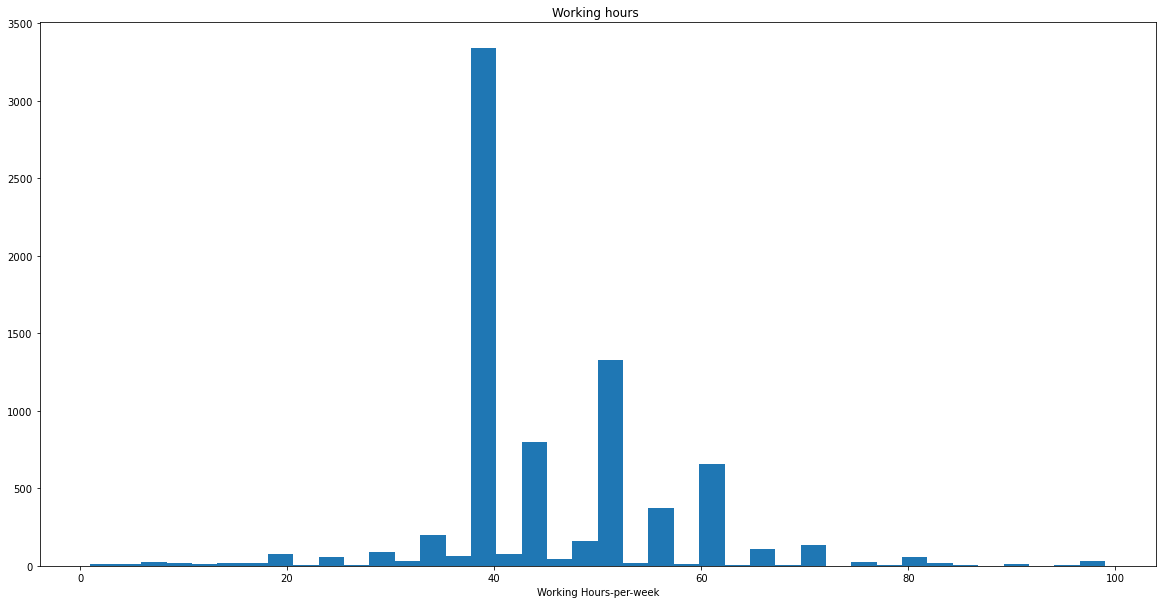

In [9]:
plt.figure(figsize=(20,10))
plt.hist(df_income_over_50k, bins=40)
plt.gca().set(title='Working hours ', xlabel='Working Hours-per-week');

### Laplace Mechanism for Histograms

### Q1

### Q2 : Use mechanism Laplace to compute query H1 with {0.01, 0.1, 1}

In [10]:
sensitivity = 1
epsilon = 0.01

df_education_num_001 = df_education_num + np.random.laplace(loc=0, scale=sensitivity/epsilon)
df_education_num_001.head(10)

0   -19.011106
1   -19.011106
2   -23.011106
3   -25.011106
4   -19.011106
5   -18.011106
6   -27.011106
7   -23.011106
8   -18.011106
9   -19.011106
Name:  Education-num, dtype: float64

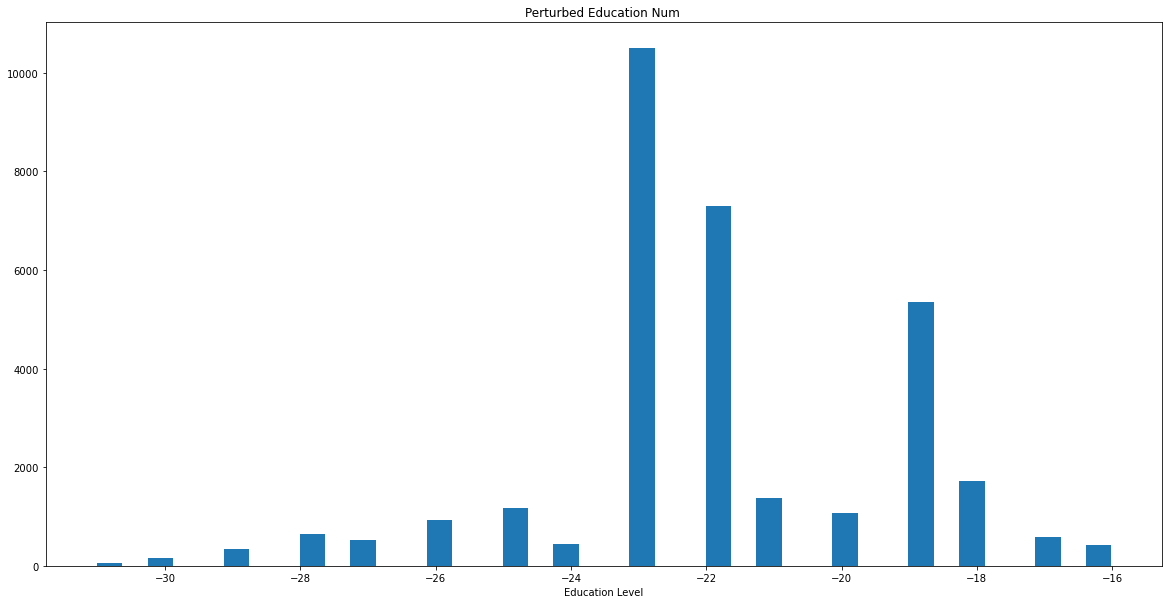

In [11]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_education_num_001, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

In [12]:
sensitivity = 1
epsilon = 0.1

df_education_num_01 = df_education_num + np.random.laplace(loc=0, scale=sensitivity/epsilon)
df_education_num_01.head(20)

0     19.221232
1     19.221232
2     15.221232
3     13.221232
4     19.221232
5     20.221232
6     11.221232
7     15.221232
8     20.221232
9     19.221232
10    16.221232
11    19.221232
12    19.221232
13    18.221232
14    17.221232
15    10.221232
16    15.221232
17    15.221232
18    13.221232
19    20.221232
Name:  Education-num, dtype: float64

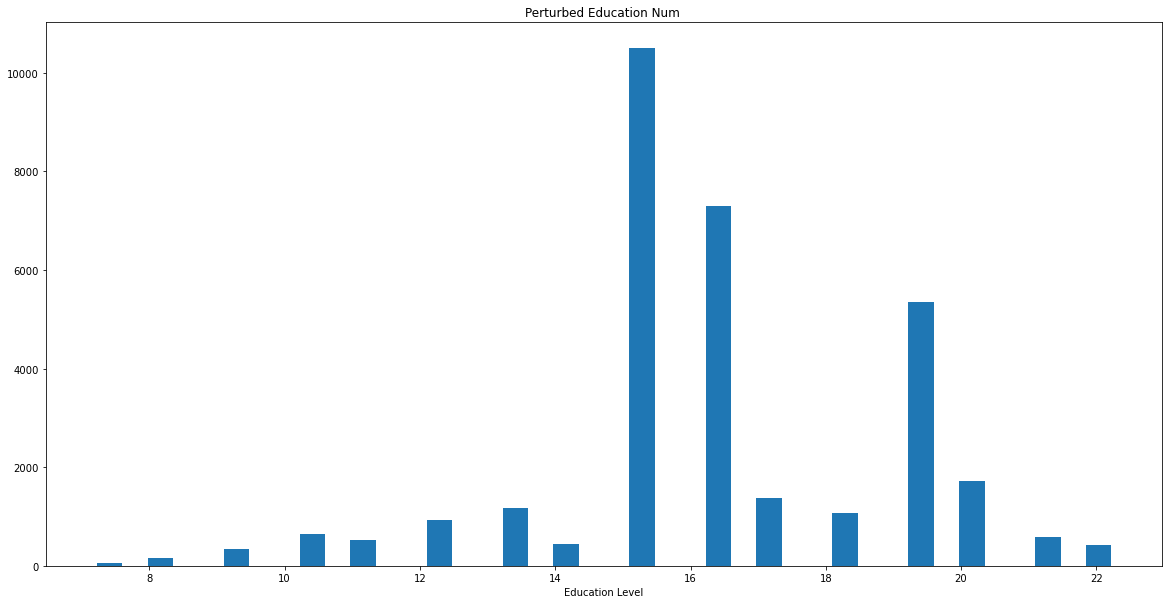

In [13]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_education_num_01, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

In [14]:
sensitivity = 1
epsilon = 1

df_education_num_1 = df_education_num + np.random.laplace(loc=0, scale=sensitivity/epsilon)
df_education_num_1.head(20)

0     13.307381
1     13.307381
2      9.307381
3      7.307381
4     13.307381
5     14.307381
6      5.307381
7      9.307381
8     14.307381
9     13.307381
10    10.307381
11    13.307381
12    13.307381
13    12.307381
14    11.307381
15     4.307381
16     9.307381
17     9.307381
18     7.307381
19    14.307381
Name:  Education-num, dtype: float64

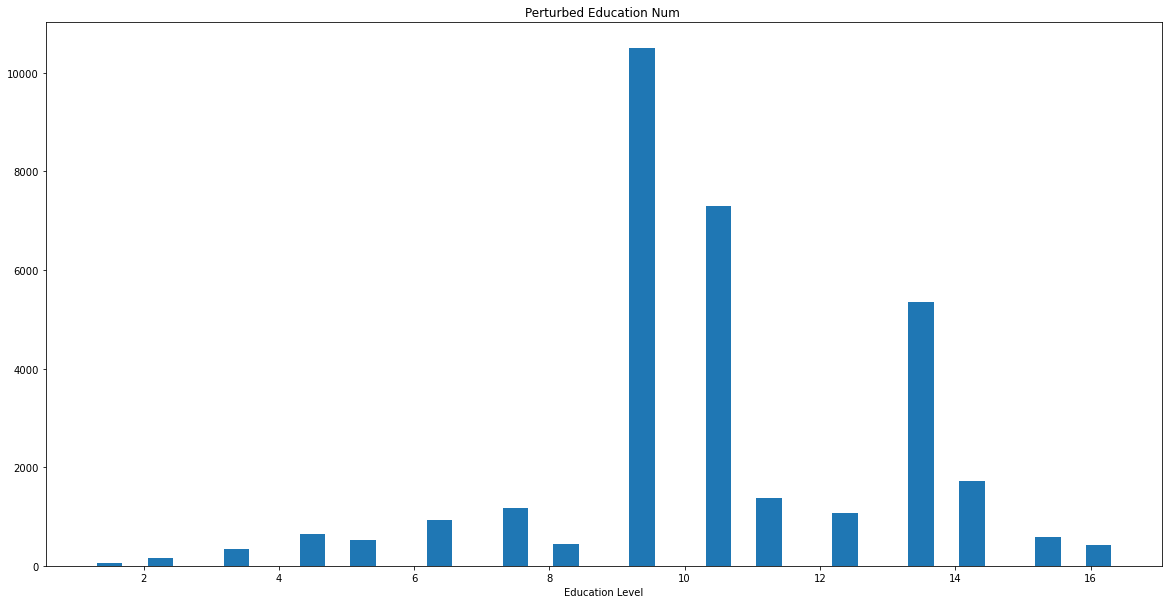

In [15]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_education_num_1, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

#### On constate qu'il n'y a pas de différence entre  les histogrammes des données non-pertubées et ceux des données pertubées

### Q3 1- :  Use mechanism Laplace to compute query H2 with {0.01, 0.1, 1}

In [16]:
sensitivity = 1
epsilon = 0.01

df_income_over_50k_001 = df_income_over_50k + np.random.laplace(loc=0, scale=sensitivity/epsilon)
df_income_over_50k_001.head(20)

7     46.279911
8     51.279911
9     41.279911
10    81.279911
11    41.279911
14    41.279911
19    46.279911
20    61.279911
25    41.279911
27    61.279911
38    39.279911
45    41.279911
52    61.279911
53    56.279911
55    41.279911
63    46.279911
67    41.279911
68    51.279911
72    71.279911
84    41.279911
Name: Hours-per-week, dtype: float64

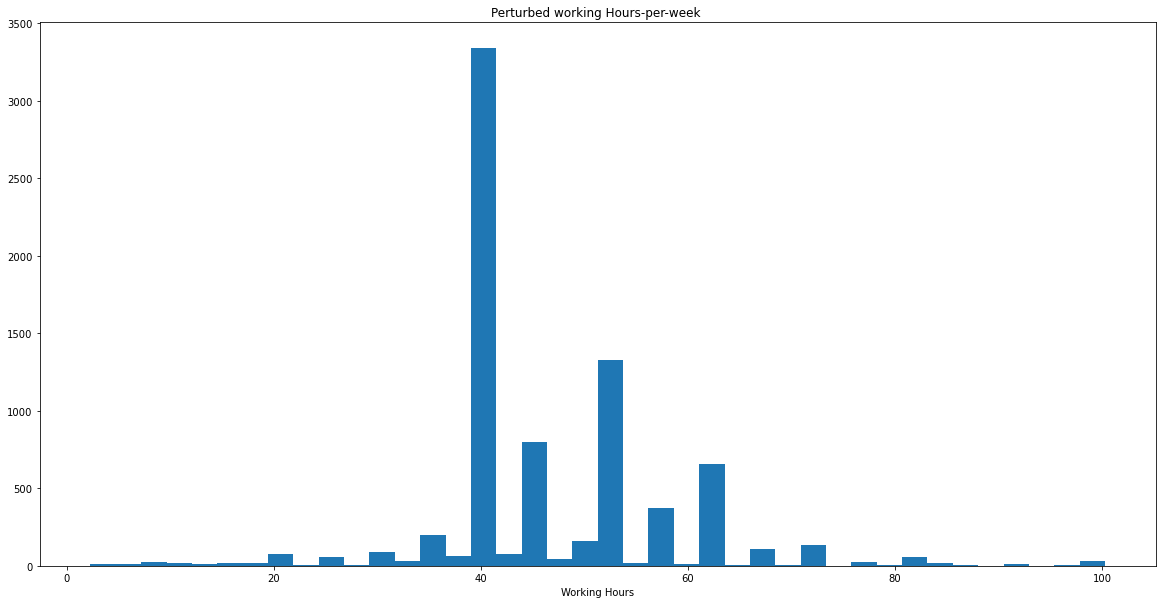

In [17]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_income_over_50k_001, bins=40)
plt.gca().set(title='Perturbed working Hours-per-week ', xlabel='Working Hours');

In [18]:
sensitivity = 1
epsilon = 0.1

df_income_over_50k_01 = df_income_over_50k + np.random.laplace(loc=0, scale=sensitivity/epsilon)
df_income_over_50k_01.head(20)

7     48.837398
8     53.837398
9     43.837398
10    83.837398
11    43.837398
14    43.837398
19    48.837398
20    63.837398
25    43.837398
27    63.837398
38    41.837398
45    43.837398
52    63.837398
53    58.837398
55    43.837398
63    48.837398
67    43.837398
68    53.837398
72    73.837398
84    43.837398
Name: Hours-per-week, dtype: float64

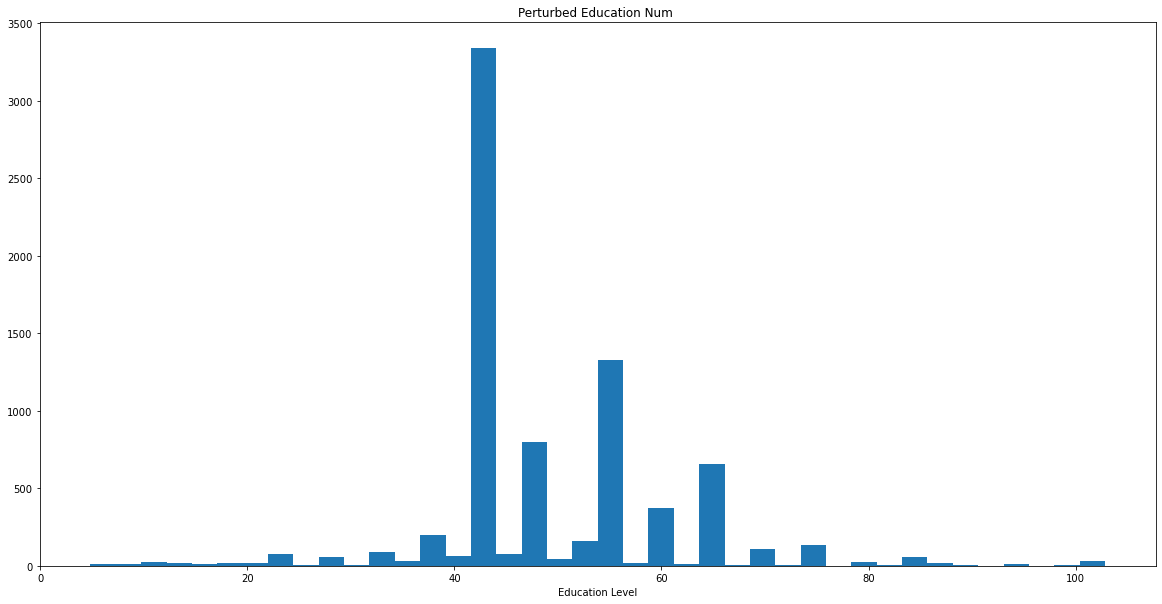

In [19]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_income_over_50k_01, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

In [20]:
sensitivity = 1
epsilon = 1

df_income_over_50k_1 = df_income_over_50k + np.random.laplace(loc=0, scale=sensitivity/epsilon)
df_income_over_50k_1.head(20)

7     44.281765
8     49.281765
9     39.281765
10    79.281765
11    39.281765
14    39.281765
19    44.281765
20    59.281765
25    39.281765
27    59.281765
38    37.281765
45    39.281765
52    59.281765
53    54.281765
55    39.281765
63    44.281765
67    39.281765
68    49.281765
72    69.281765
84    39.281765
Name: Hours-per-week, dtype: float64

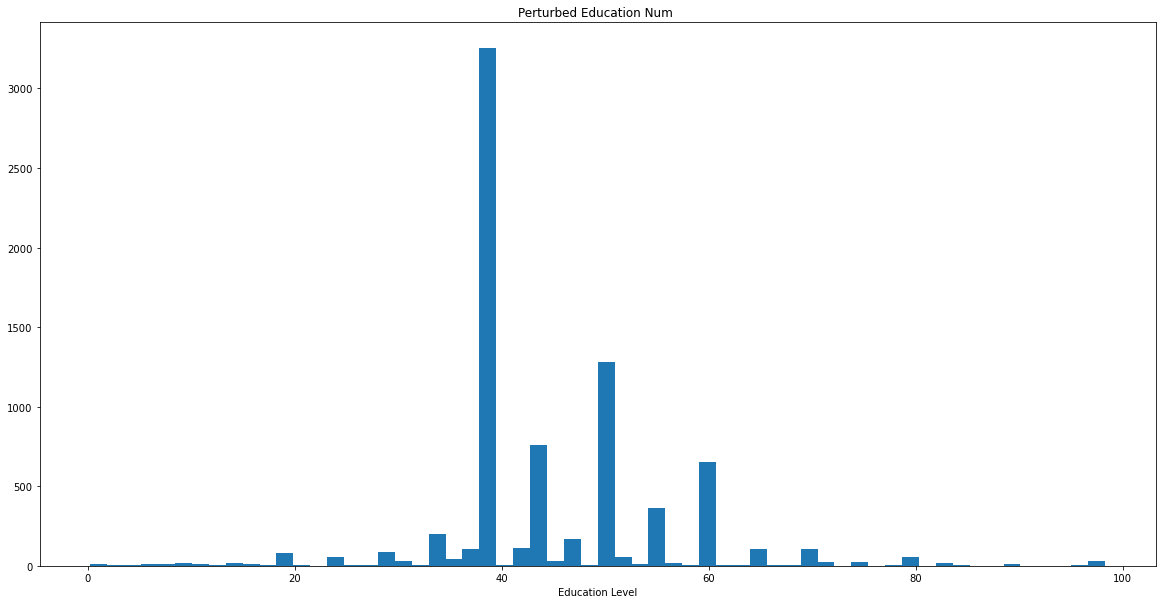

In [21]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_income_over_50k_1, bins=60)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

#### L'augmentation du bins diminue la largeur des barres de l'histogramme (voir l'histogramme ci-dessus)

# 2. Basic Fourier Perturbation Algorithm

#### Q4.Implemention of the Basic FPA algorithm

In [22]:
#fonction de calcul de la transformée de fourier
def bfpa(x, k):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [23]:
x = np.random.random(1024)
#np.allclose(DFT_slow(x), np.fft.fft(x))

In [24]:
np.fft.fft(x)

array([5.14799007e+02+0.j        , 1.65547079e+00+8.57554903j,
       2.89626499e+00+5.39511332j, ..., 1.72793424e-01-6.52830859j,
       2.89626499e+00-5.39511332j, 1.65547079e+00-8.57554903j])

In [25]:
coefficient_education = bfpa(df_education_num.values, k = 5)
coefficient_education

(288.70589539929824+13.594715174262092j)

#### Q5. Use Basic FPA to compute query H1

In [26]:
sensitivity = 1
epsilon = 0.01

df_education_num_001 = df_education_num + np.random.laplace(loc=coefficient_education, scale=sensitivity/epsilon)
df_education_num_001.head(10)

<ipython-input-26-9ba21fc88661>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  df_education_num_001 = df_education_num + np.random.laplace(loc=coefficient_education, scale=sensitivity/epsilon)


0    376.69955
1    376.69955
2    372.69955
3    370.69955
4    376.69955
5    377.69955
6    368.69955
7    372.69955
8    377.69955
9    376.69955
Name:  Education-num, dtype: float64

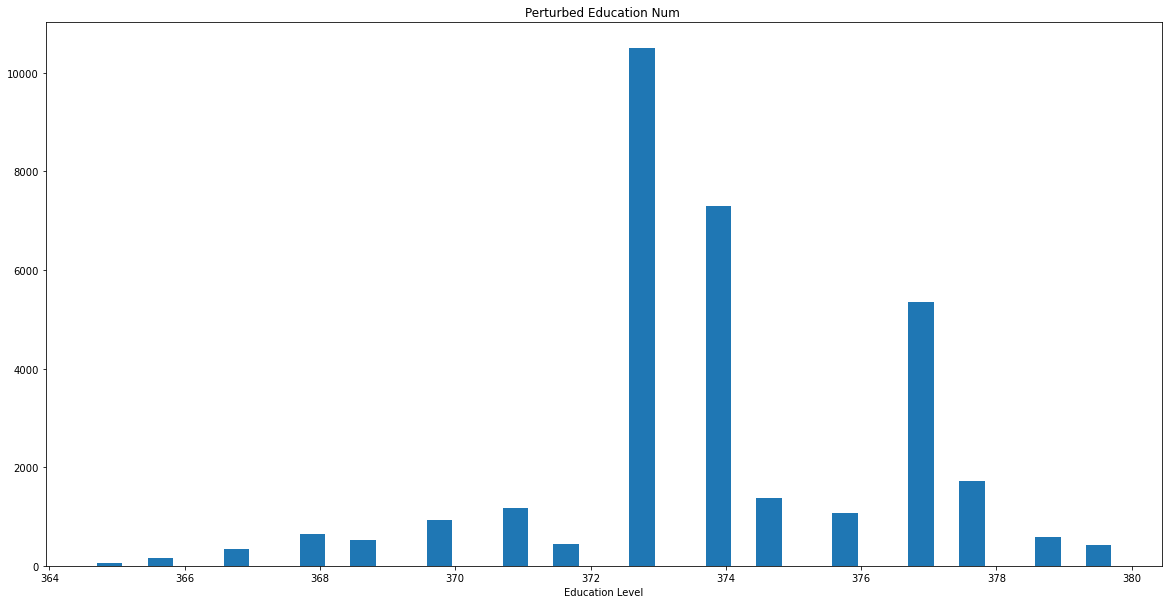

In [27]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_education_num_001, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

In [28]:
#Epsilon = 0.1
sensitivity = 1
epsilon = 0.1

df_education_num_01 = df_education_num + np.random.laplace(loc=coefficient_education, scale=sensitivity/epsilon)
df_education_num_01.head(10)

<ipython-input-28-580b36b0ff65>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  df_education_num_01 = df_education_num + np.random.laplace(loc=coefficient_education, scale=sensitivity/epsilon)


0    313.728712
1    313.728712
2    309.728712
3    307.728712
4    313.728712
5    314.728712
6    305.728712
7    309.728712
8    314.728712
9    313.728712
Name:  Education-num, dtype: float64

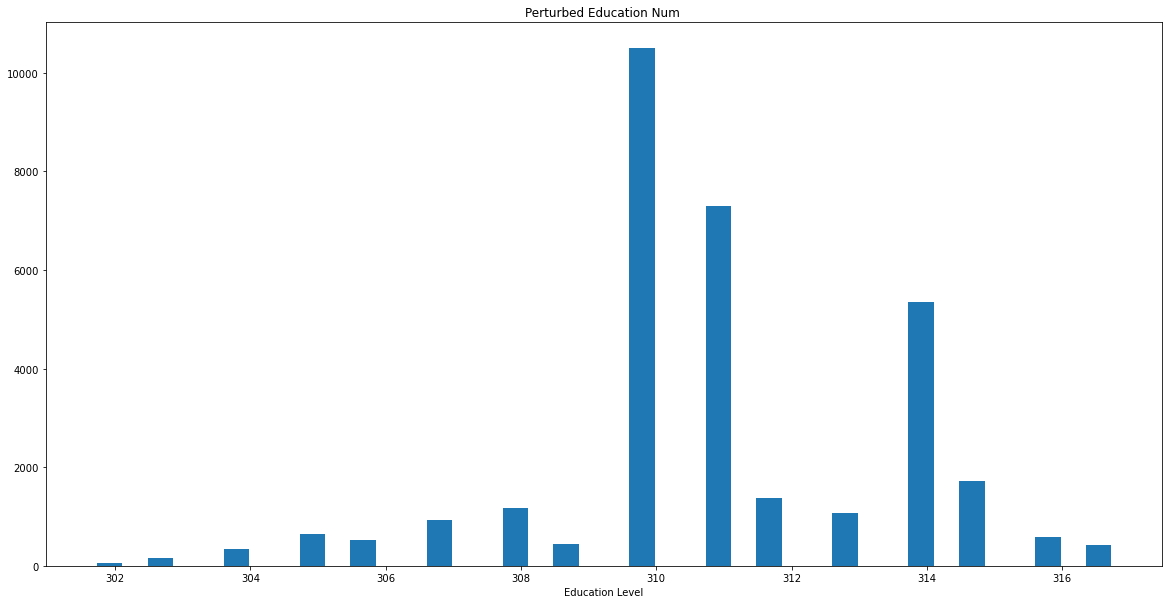

In [29]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_education_num_01, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

In [30]:
#Epsilon = 1
sensitivity = 1
epsilon = 1

df_education_num_1 = df_education_num + np.random.laplace(loc=coefficient_education, scale=sensitivity/epsilon)
df_education_num_1.head(10)

<ipython-input-30-b47aa86edccb>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  df_education_num_1 = df_education_num + np.random.laplace(loc=coefficient_education, scale=sensitivity/epsilon)


0    300.891746
1    300.891746
2    296.891746
3    294.891746
4    300.891746
5    301.891746
6    292.891746
7    296.891746
8    301.891746
9    300.891746
Name:  Education-num, dtype: float64

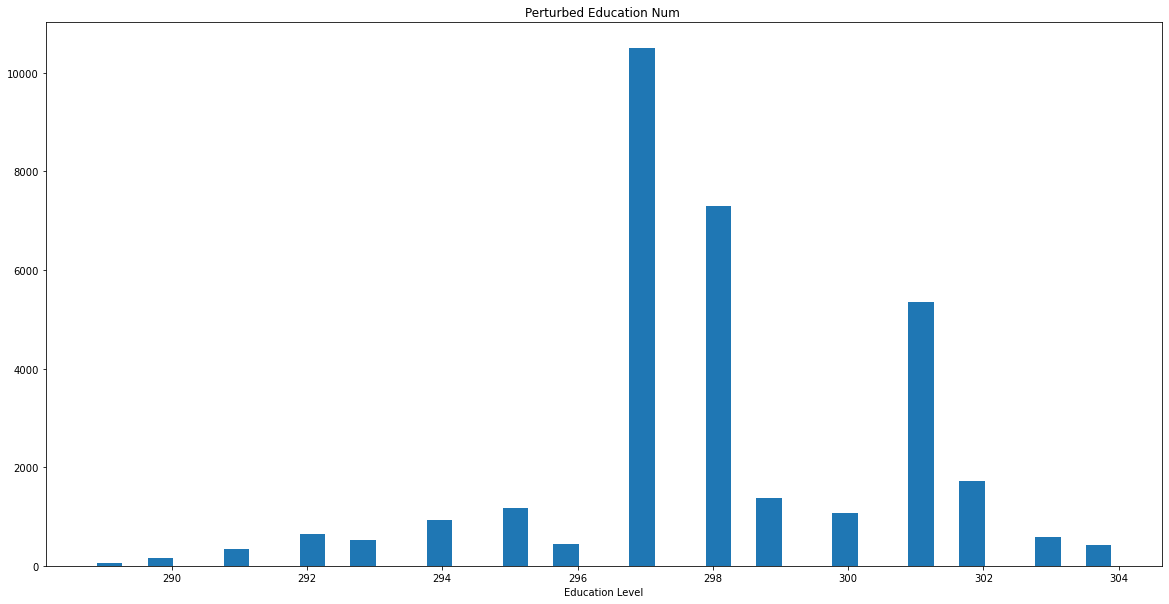

In [31]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_education_num_1, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

#### On constate qu'il n'y a pas de différence entre  les histogrammes des données non-pertubées et ceux des données pertubées

In [32]:
#### Q6. Use Basic FPA to compute query H2

In [33]:
coefficient_working_per_week = bfpa(df_education_num.values, k = 5)
coefficient_working_per_week

(288.70589539929824+13.594715174262092j)

In [34]:
sensitivity = 1
epsilon = 0.01

df_income_over_50k_001 = df_income_over_50k + np.random.laplace(loc=coefficient_working_per_week, scale=sensitivity/epsilon)
df_income_over_50k_001.head(10)

<ipython-input-34-21a49726f833>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  df_income_over_50k_001 = df_income_over_50k + np.random.laplace(loc=coefficient_working_per_week, scale=sensitivity/epsilon)


7     323.982083
8     328.982083
9     318.982083
10    358.982083
11    318.982083
14    318.982083
19    323.982083
20    338.982083
25    318.982083
27    338.982083
Name: Hours-per-week, dtype: float64

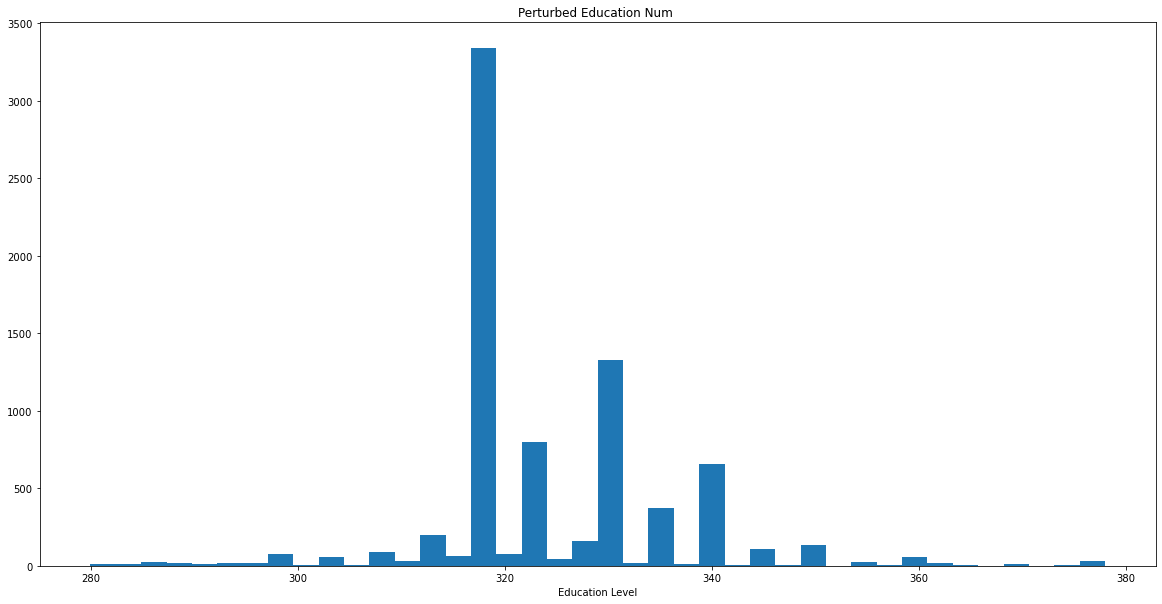

In [35]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_income_over_50k_001, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

In [36]:
sensitivity = 1
epsilon = 0.1

df_income_over_50k_01 = df_income_over_50k + np.random.laplace(loc=coefficient_working_per_week, scale=sensitivity/epsilon)
df_income_over_50k_01.head(10)

<ipython-input-36-c700641637af>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  df_income_over_50k_01 = df_income_over_50k + np.random.laplace(loc=coefficient_working_per_week, scale=sensitivity/epsilon)


7     334.30383
8     339.30383
9     329.30383
10    369.30383
11    329.30383
14    329.30383
19    334.30383
20    349.30383
25    329.30383
27    349.30383
Name: Hours-per-week, dtype: float64

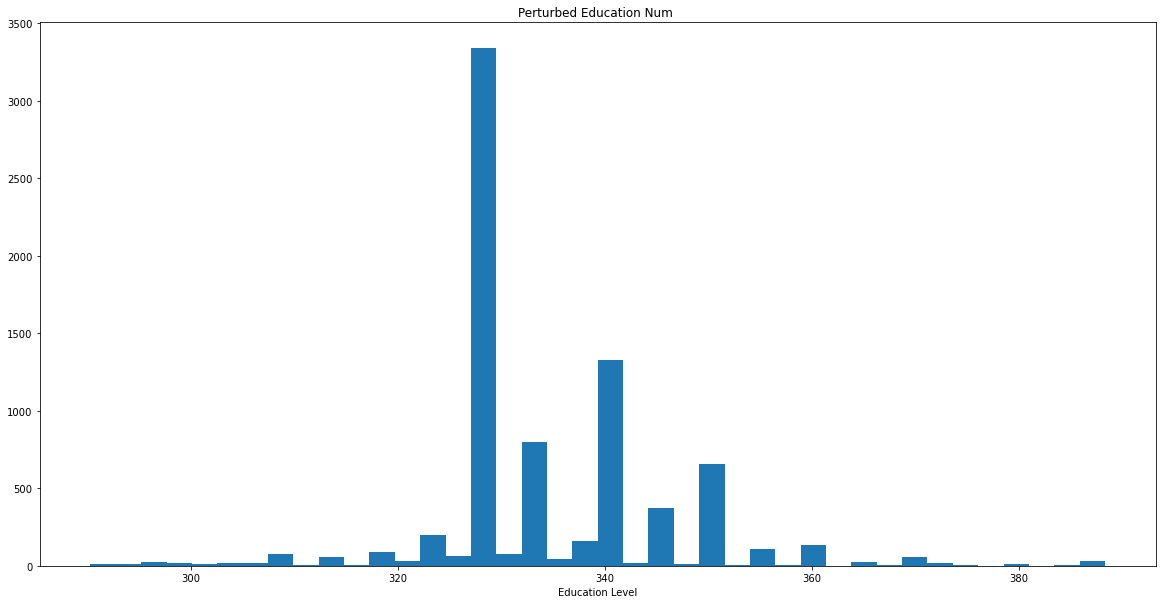

In [37]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_income_over_50k_01, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

In [38]:
sensitivity = 1
epsilon = 1

df_income_over_50k_1 = df_income_over_50k + np.random.laplace(loc=coefficient_working_per_week, scale=sensitivity/epsilon)
df_income_over_50k_1.head(10)

<ipython-input-38-5d72f8fe43d7>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  df_income_over_50k_1 = df_income_over_50k + np.random.laplace(loc=coefficient_working_per_week, scale=sensitivity/epsilon)


7     333.579571
8     338.579571
9     328.579571
10    368.579571
11    328.579571
14    328.579571
19    333.579571
20    348.579571
25    328.579571
27    348.579571
Name: Hours-per-week, dtype: float64

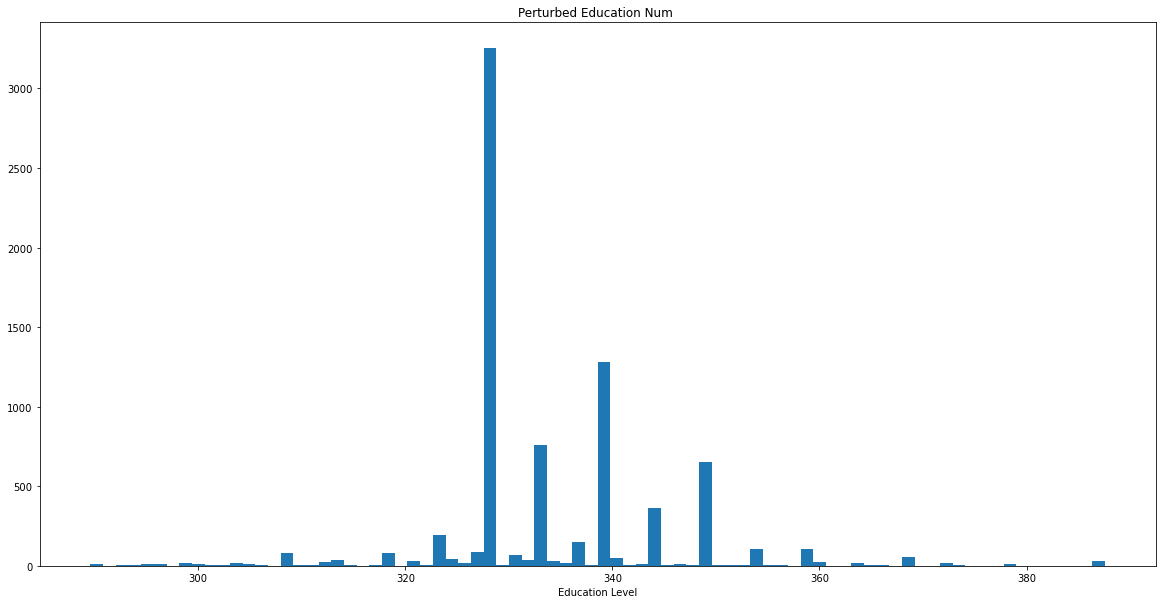

In [39]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_income_over_50k_1, bins=80)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

#### L'augmentation du bins diminue la largeur des barres de l'histogramme (voir l'histogramme ci-dessus)